In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

C:\Users\moumi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[1]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

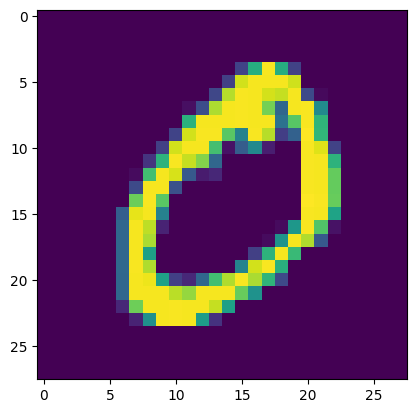

In [7]:
plt.imshow(single_image)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [15]:
y_cat_test.shape

(10000, 10)

In [16]:
y_cat_train = to_categorical(y_train, 10)

In [17]:
y_cat_train.shape

(60000, 10)

In [18]:
x_train = x_train / x_train.max()

In [19]:
x_test = x_test / x_test.max()

In [20]:
scaled_single = x_train[0]

In [21]:
scaled_single.max()

1.0

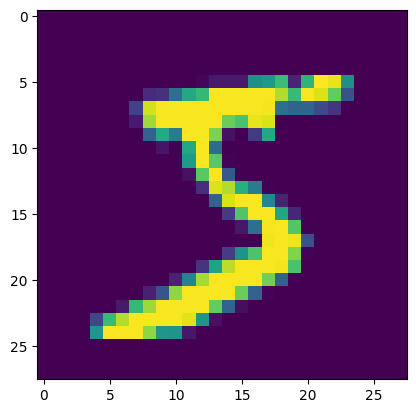

In [22]:
plt.imshow(scaled_single)

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
# batch size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)

In [25]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [26]:
x_test.shape

(10000, 28, 28, 1)

# Partie 2- Modele et entrainement

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [31]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10


1875/1875 [==============================] - 17s 9ms/step - loss: 0.1394 - accuracy: 0.9585 - val_loss: 0.0562 - val_accuracy: 0.9818
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0422 - val_accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0311 - val_accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0202 - accuracy: 0.9935 - val_loss: 0.0353 - val_accuracy: 0.9882


# Parti 3 - Evaluation du modele

In [32]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.139390,0.958450,0.056189,0.9818
1,0.047450,0.985083,0.042230,0.9864
2,0.030216,0.990300,0.031097,0.9893
3,0.020199,0.993533,0.035275,0.9882


<AxesSubplot: >

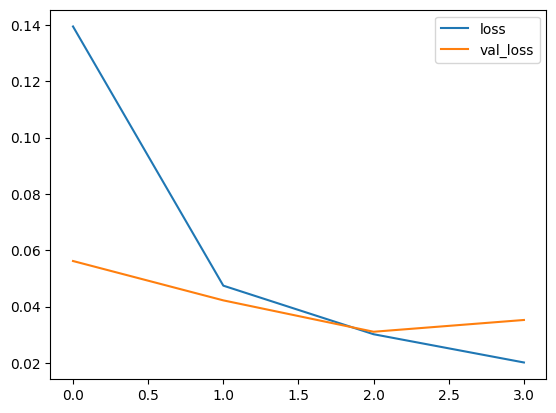

In [33]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot: >

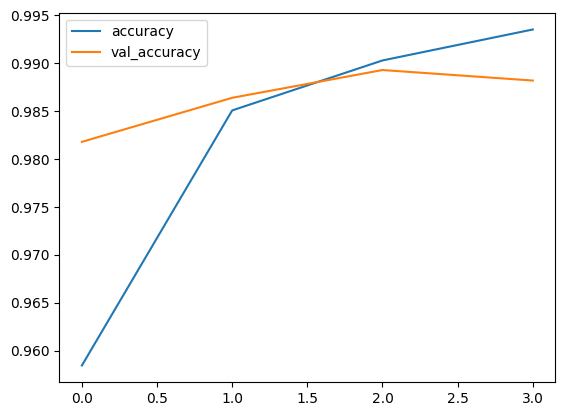

In [34]:
metrics[['accuracy', 'val_accuracy']].plot()

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.03527463600039482, 0.9882000088691711]

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


array([[2.5033606e-10, 3.6250555e-10, 2.4304641e-09, ..., 9.9999845e-01,
        8.0667064e-09, 1.5278065e-06],
       [1.0811749e-08, 2.1143870e-07, 9.9999976e-01, ..., 6.5795025e-10,
        3.9224308e-09, 2.3766017e-10],
       [7.9491144e-07, 9.9954551e-01, 5.0139734e-06, ..., 3.9884454e-04,
        3.3885961e-05, 2.6941564e-06],
       ...,
       [7.0523481e-16, 9.7135980e-11, 8.1392916e-13, ..., 7.5376292e-09,
        3.2673513e-09, 5.0801475e-07],
       [4.6160636e-12, 8.8672423e-14, 1.3914701e-14, ..., 4.9219634e-12,
        2.6021226e-07, 2.5832084e-10],
       [1.2997465e-09, 3.5866402e-10, 1.0014528e-09, ..., 2.1032984e-11,
        3.9945591e-10, 1.3333216e-11]], dtype=float32)

In [39]:
model.predict(x_test)[0].sum()

313/313 [==============================] - 2s 5ms/step


1.0

In [40]:
predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 4ms/step


In [41]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [42]:
y_cat_test.shape

(10000, 10)

In [43]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [45]:
confusion_matrix(y_test, predictions)

array([[ 977,    0,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1121,    3,    1,    2,    1,    1,    6,    0,    0],
       [   0,    0, 1017,    0,    1,    0,    1,   11,    2,    0],
       [   0,    0,    2, 1000,    0,    1,    0,    4,    2,    1],
       [   0,    0,    0,    0,  970,    0,    1,    0,    0,   11],
       [   3,    0,    0,    5,    0,  882,    2,    0,    0,    0],
       [   4,    2,    0,    0,    1,    1,  949,    0,    1,    0],
       [   0,    0,    4,    0,    0,    0,    0, 1018,    1,    5],
       [   3,    0,    1,    1,    2,    0,    2,    3,  958,    4],
       [   0,    1,    0,    0,    7,    6,    0,    3,    2,  990]],
      dtype=int64)

In [46]:
import seaborn as sns

<AxesSubplot: >

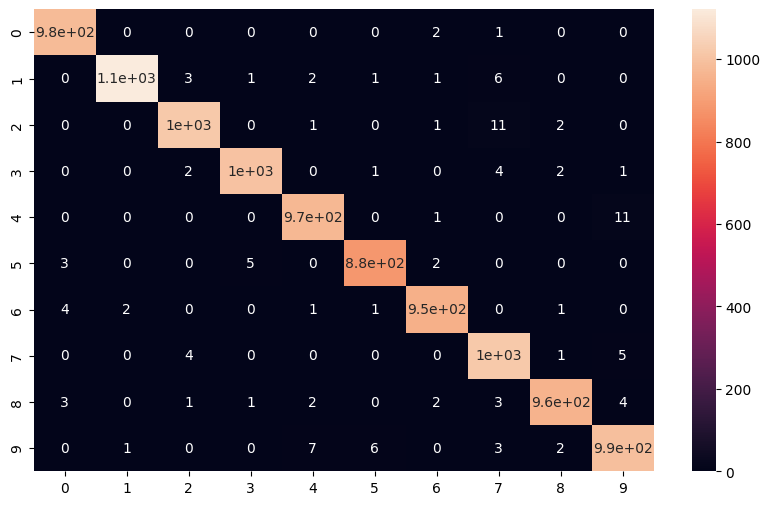

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [50]:
my_number = x_test[9]

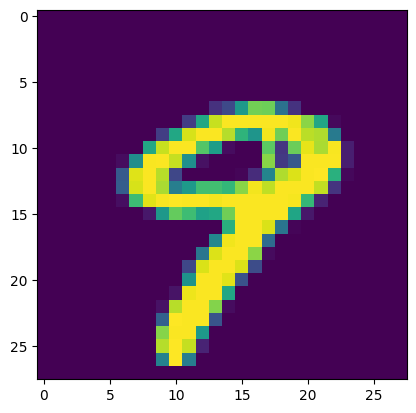

In [51]:
plt.imshow(my_number.reshape(28, 28))

In [52]:
# SHAPE --> (num_images, width, height, color_channels)
np.argmax(model.predict(my_number.reshape(1, 28, 28, 1)), axis=-1)

1/1 [==============================] - 0s 43ms/step


array([9], dtype=int64)